In [3]:
import pandas as pd
import numpy as np

In [4]:
powiaty = pd.read_excel("Powiaty.xls")
powiaty.head()

,Powiaty,Id,X1_s,X2_s,X3_d,X4_d,X5_d,X6_d
0,chodzieski,251,0.638029,1648.80,0.231,0.282360,0.536464,0.064824
1,czarnkowsko-trzcianecki,252,0.635018,1800.35,0.248,0.295556,0.512332,0.115621
2,gnieźnieński,253,0.571948,1801.16,0.232,0.308769,0.468553,0.246254
3,gostyński,254,0.707542,1815.27,0.194,0.362074,0.470871,0.077338
4,grodziski,255,0.645110,1710.91,0.121,0.412271,0.417134,0.141414


Dokonujemy normalizacji metodą unitaryzacji zerowanej.

In [5]:
powiaty["z1"] = (powiaty.X1_s - np.min(powiaty.X1_s)) / (np.max(powiaty.X1_s) - np.min(powiaty.X1_s))
powiaty["z2"] = (powiaty.X2_s - np.min(powiaty.X2_s)) / (np.max(powiaty.X2_s) - np.min(powiaty.X2_s))
powiaty["z3"] = (np.max(powiaty.X3_d) - powiaty.X3_d ) / (np.max(powiaty.X3_d) - np.min(powiaty.X3_d))
powiaty["z4"] = (np.max(powiaty.X4_d) - powiaty.X4_d ) / (np.max(powiaty.X4_d) - np.min(powiaty.X4_d))
powiaty["z5"] = (np.max(powiaty.X5_d) - powiaty.X5_d ) / (np.max(powiaty.X5_d) - np.min(powiaty.X5_d))
powiaty["z6"] = (np.max(powiaty.X6_d) - powiaty.X6_d ) / (np.max(powiaty.X6_d) - np.min(powiaty.X6_d))
powiaty.loc[:, "z1":"z6"].describe()

,z1,z2,z3,z4,z5,z6
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.664574,0.409495,0.467755,0.465635,0.494289,0.809949
std,0.174233,0.212612,0.230894,0.234979,0.232728,0.203337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602556,0.268325,0.271429,0.271943,0.332606,0.777517
50%,0.671521,0.380412,0.461905,0.449770,0.519235,0.860363
75%,0.729207,0.512172,0.650000,0.621935,0.654467,0.945407
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Wyznaczamy miernik syntetyczny metodą bezwzorcową

$$
\bar{q}_i = \frac{\sum_i^k z_{ik}}{k}
$$

In [6]:
powiaty["miernik"] = powiaty.loc[:, "z1":"z6"].mean(axis = 1) ## srednia po kolumnach dla kazdego wiersza
powiaty.head()

,Powiaty,Id,X1_s,X2_s,X3_d,X4_d,X5_d,X6_d,z1,z2,z3,z4,z5,z6,miernik
0,chodzieski,251,0.638029,1648.80,0.231,0.282360,0.536464,0.064824,0.706672,0.253130,0.228571,0.766913,0.261067,1.000000,0.536059
1,czarnkowsko-trzcianecki,252,0.635018,1800.35,0.248,0.295556,0.512332,0.115621,0.701631,0.384236,0.147619,0.689012,0.356047,0.881383,0.526655
2,gnieźnieński,253,0.571948,1801.16,0.232,0.308769,0.468553,0.246254,0.596050,0.384937,0.223810,0.611014,0.528359,0.576335,0.486751
3,gostyński,254,0.707542,1815.27,0.194,0.362074,0.470871,0.077338,0.823039,0.397143,0.404762,0.296332,0.519235,0.970780,0.568549
4,grodziski,255,0.645110,1710.91,0.121,0.412271,0.417134,0.141414,0.718526,0.306861,0.752381,0.000000,0.730738,0.821152,0.554943


In [7]:
powiaty.sort_values(by = "miernik", ascending=False, inplace=True)
powiaty[["Powiaty", "miernik"]]

,Powiaty,miernik
34,Poznań,0.867575
20,poznański,0.796835
33,Leszno,0.691035
31,Kalisz,0.643147
23,szamotulski,0.629432
28,wolsztyński,0.625491
12,leszczyński,0.625481
17,ostrzeszowski,0.618537
10,kościański,0.612419
24,średzki,0.601480


Wyznaczamy wskaźnik metodą wzorcową zakładając, że wartości maksymalne naszych zmiennych znormalizowanych są wzorcem.

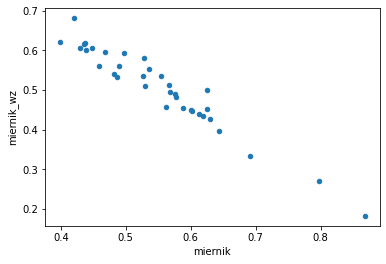

In [8]:
mier_wzorcowy = powiaty.loc[:, "z1":"z6"] - powiaty.loc[:, "z1":"z6"].max(axis = 0)
powiaty["miernik_wz"] = np.sqrt(np.mean(mier_wzorcowy**2, axis = 1))

powiaty.plot.scatter(x = "miernik", y = "miernik_wz")

Wczytujemy dane dotyczącece nieruchomości na wynajem w Poznaniu. Celem naszej analizy jest zbudowanie rankingu wybranych dzielnic Poznania na podstawie charakterystyk nieruchomości, które się tam znajdują. Ranking budujemy z punktu widzenia studenta/studentki.

In [9]:
rent = pd.read_excel("rent-poznan.xlsx")
rent.head(n=2)

,id,date_activ,date_modif,date_expire,individual,price,flat_area,flat_rooms,flat_floor_no,flat_build_year,flat_furnished,flat_rent,flat_deposit,flat_price_include_rent,flat_for_students,flat_heating,flat_status,flat_windows,building_floor_num,building_type,building_material,ad_title,ad_seller_id,ad_promo,flat_balcony,flat_utility_room,flat_garage,flat_basement,flat_garden,flat_tarrace,flat_lift,flat_two_level,flat_kitchen_sep,flat_air_cond,flat_nonsmokers,flat_washmachine,flat_dishwasher,flat_fridge,flat_cooker,flat_oven,flat_tv_device,flat_internet,flat_television,flat_phone,flat_anti_blinds,flat_anti_doors_windows,flat_intercom,flat_monitoring,flat_alarm_sys,flat_closed_area,quarter
0,19576742,2015-03-24,2020-09-05,2020-10-05,True,1400,30.0,1,2.0,0,True,360,1400.0,False,True,0.0,0.0,0.0,0,0.0,NaN,"Ładna, kawalerka. BEZPOŚREDNIO.",592916,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,Rataje
1,20292499,2013-07-19,2020-08-30,2020-09-09,True,4600,160.0,4,4.0,1900,True,0,0.0,False,True,1.0,0.0,0.0,5,1.0,0.0,Apartment in very center of Poznan - direct of...,226529,False,False,True,False,False,False,False,False,False,True,False,False,True,True,True,True,True,False,True,True,True,False,False,True,True,True,False,Stare Miasto


Zrobimy następujące ograniczenia zbioru danych:

- cena ma być z przedziału 800 - 2000
- flat_area ma być z przedziału 20-70
- flat_rooms ma być 1, 2, 3 lub 4
- na koniec sprawdzimy dzielnice bo ograniczmy je tylko do tych, których jest najwięcej 

In [10]:
rent_analiza = rent.query("price >= 800 & price <= 2000 & flat_area >= 20 & flat_area <= 70 & flat_rooms >= 1 & flat_rooms <= 4")
rent_analiza.shape

(12100, 51)

Chcemy sprawdzić ile ogłoszeń dotyczy poszczególnych dzielnic Poznania.

In [11]:
pd.set_option("max_rows", 100)
rent_analiza.value_counts("quarter") ## na tej podstawie okreslamy dzielnice
lista_dzielnic = ["Grunwald", "Rataje", "Centrum", "Jeżyce", "Piątkowo", "Winogrady",
                  "Wilda", "Łazarz", "Naramowice", "Winiary"]

In [12]:
rent_analiza2=rent_analiza.query("quarter == @lista_dzielnic")
rent_analiza2.head(n=2)

,id,date_activ,date_modif,date_expire,individual,price,flat_area,flat_rooms,flat_floor_no,flat_build_year,flat_furnished,flat_rent,flat_deposit,flat_price_include_rent,flat_for_students,flat_heating,flat_status,flat_windows,building_floor_num,building_type,building_material,ad_title,ad_seller_id,ad_promo,flat_balcony,flat_utility_room,flat_garage,flat_basement,flat_garden,flat_tarrace,flat_lift,flat_two_level,flat_kitchen_sep,flat_air_cond,flat_nonsmokers,flat_washmachine,flat_dishwasher,flat_fridge,flat_cooker,flat_oven,flat_tv_device,flat_internet,flat_television,flat_phone,flat_anti_blinds,flat_anti_doors_windows,flat_intercom,flat_monitoring,flat_alarm_sys,flat_closed_area,quarter
0,19576742,2015-03-24,2020-09-05,2020-10-05,True,1400,30.0,1,2.0,0,True,360,1400.0,False,True,0.0,0.0,0.0,0,0.0,NaN,"Ładna, kawalerka. BEZPOŚREDNIO.",592916,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,Rataje
4,30774505,2014-08-17,2019-11-15,2019-12-15,True,1200,32.5,1,3.0,2000,True,350,1200.0,False,True,0.0,0.0,0.0,5,0.0,NaN,Kawalerka Poznań Rataje niska zabudowa 2 piętro,762749,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,True,True,False,False,Rataje


Wybieramy charakterystyki według których chcelibysmy przeprowadzić porządkowanie.

- price -- destymulanta 
- flat_area - stymulanta
- flat_rooms - stymulanta
- individual -- stymulanta
- flat_furnished - stymulanta
- flat_deposit -- desymulanta
- flat_for_students - stymulanta
- flat_balcony -- stymulanta


Tworzymy zbiór danych na potrzeby porządkowania linowego.

In [13]:
lista_zmiennych = ["price", "flat_area", "flat_rooms", "individual", "flat_furnished",
                   "flat_deposit", "flat_for_students", "flat_balcony"]
dane_porzadkowanie = rent_analiza2.groupby("quarter")[lista_zmiennych].mean().reset_index()
dane_porzadkowanie

,quarter,price,flat_area,flat_rooms,individual,flat_furnished,flat_deposit,flat_for_students,flat_balcony
0,Centrum,1529.770606,38.768203,1.562066,0.155909,0.465740,941.001986,0.329692,0.378352
1,Grunwald,1491.070532,42.168631,1.787209,0.271369,0.490735,1090.710102,0.248655,0.517633
2,Jeżyce,1496.170854,39.767045,1.622111,0.291457,0.501508,1119.617085,0.294472,0.467337
3,Naramowice,1530.036036,46.107815,1.995495,0.364865,0.531532,1367.081081,0.263514,0.686937
4,Piątkowo,1524.592284,46.905746,1.981230,0.335766,0.482795,1163.450469,0.289885,0.732013
5,Rataje,1521.517341,44.125029,2.001927,0.330443,0.558767,1182.788054,0.350674,0.622351
6,Wilda,1519.372788,40.210830,1.655973,0.285398,0.453540,953.551991,0.275442,0.413717
7,Winiary,1555.577586,46.462069,2.189655,0.301724,0.620690,1547.836207,0.474138,0.681034
8,Winogrady,1496.626596,42.081596,1.925532,0.347872,0.587234,1190.628723,0.325532,0.624468
9,Łazarz,1453.552413,39.737920,1.605657,0.297837,0.470882,1077.940100,0.299501,0.331115


In [14]:
des = dane_porzadkowanie[["price", "flat_deposit"]].apply(lambda x: (max(x) - x)/(max(x)-min(x)))

stym = dane_porzadkowanie[["flat_area", "flat_rooms", "individual", 
                          "flat_furnished", "flat_for_students", 
                          "flat_balcony"]].apply(lambda x: (x - min(x))/(max(x)-min(x)))

dane_porz = pd.concat([dane_porzadkowanie["quarter"], stym, des], axis = 1)
dane_porz.head(n=2)


,quarter,flat_area,flat_rooms,individual,flat_furnished,flat_for_students,flat_balcony,price,flat_deposit
0,Centrum,0.000000,0.000000,0.000000,0.072988,0.359393,0.117827,0.252947,1.000000
1,Grunwald,0.417869,0.358742,0.552557,0.222527,0.000000,0.465251,0.632266,0.753297


In [15]:
dane_porz["miernik"] = dane_porz.loc[:, "flat_area":"flat_deposit"].mean(axis = 1)
dane_porz.sort_values("miernik", ascending=False, inplace = True)
dane_porz

,quarter,flat_area,flat_rooms,individual,flat_furnished,flat_for_students,flat_balcony,price,flat_deposit,miernik
7,Winiary,0.945478,1.000000,0.697828,1.000000,1.000000,0.872840,0.000000,0.000000,0.689518
8,Winogrady,0.407174,0.579147,0.918679,0.799847,0.340943,0.731741,0.577808,0.588641,0.617997
5,Rataje,0.658285,0.700874,0.835268,0.629537,0.452448,0.726459,0.333842,0.601562,0.617284
4,Piątkowo,1.000000,0.667896,0.860744,0.175021,0.182853,1.000000,0.303703,0.633428,0.602956
3,Naramowice,0.901945,0.690626,1.000000,0.466598,0.065896,0.887563,0.250346,0.297866,0.570105
1,Grunwald,0.417869,0.358742,0.552557,0.222527,0.000000,0.465251,0.632266,0.753297,0.425314
2,Jeżyce,0.122745,0.095676,0.648694,0.286974,0.203196,0.339792,0.582275,0.705661,0.373127
9,Łazarz,0.119166,0.069459,0.679225,0.103751,0.225497,0.000000,1.000000,0.774340,0.371430
6,Wilda,0.177280,0.149633,0.619697,0.000000,0.118800,0.206043,0.354861,0.979319,0.325704
0,Centrum,0.000000,0.000000,0.000000,0.072988,0.359393,0.117827,0.252947,1.000000,0.225395


W jednej linii całość

In [16]:
lista_dzielnic = ["Grunwald", "Rataje", "Centrum", "Jeżyce", "Piątkowo", "Winogrady",
                  "Wilda", "Łazarz", "Naramowice", "Winiary"]
lista_zmiennych = ["price", "flat_area", "flat_rooms", "individual", "flat_furnished",
                   "flat_deposit", "flat_for_students", "flat_balcony"]

(
   rent
   .query("price >= 800 & price <= 2000 & flat_area >= 20 & flat_area <= 70 & flat_rooms >= 1 & flat_rooms <= 4 & quarter == @lista_dzielnic")
   .groupby("quarter")[lista_zmiennych].mean().reset_index()
)

,quarter,price,flat_area,flat_rooms,individual,flat_furnished,flat_deposit,flat_for_students,flat_balcony
0,Centrum,1529.770606,38.768203,1.562066,0.155909,0.465740,941.001986,0.329692,0.378352
1,Grunwald,1491.070532,42.168631,1.787209,0.271369,0.490735,1090.710102,0.248655,0.517633
2,Jeżyce,1496.170854,39.767045,1.622111,0.291457,0.501508,1119.617085,0.294472,0.467337
3,Naramowice,1530.036036,46.107815,1.995495,0.364865,0.531532,1367.081081,0.263514,0.686937
4,Piątkowo,1524.592284,46.905746,1.981230,0.335766,0.482795,1163.450469,0.289885,0.732013
5,Rataje,1521.517341,44.125029,2.001927,0.330443,0.558767,1182.788054,0.350674,0.622351
6,Wilda,1519.372788,40.210830,1.655973,0.285398,0.453540,953.551991,0.275442,0.413717
7,Winiary,1555.577586,46.462069,2.189655,0.301724,0.620690,1547.836207,0.474138,0.681034
8,Winogrady,1496.626596,42.081596,1.925532,0.347872,0.587234,1190.628723,0.325532,0.624468
9,Łazarz,1453.552413,39.737920,1.605657,0.297837,0.470882,1077.940100,0.299501,0.331115


# Metoda TOPSIS

Dokonujemy porządkowania liniowego metodą TOPIS

In [17]:
dane_porzadkowanie

,quarter,price,flat_area,flat_rooms,individual,flat_furnished,flat_deposit,flat_for_students,flat_balcony
0,Centrum,1529.770606,38.768203,1.562066,0.155909,0.465740,941.001986,0.329692,0.378352
1,Grunwald,1491.070532,42.168631,1.787209,0.271369,0.490735,1090.710102,0.248655,0.517633
2,Jeżyce,1496.170854,39.767045,1.622111,0.291457,0.501508,1119.617085,0.294472,0.467337
3,Naramowice,1530.036036,46.107815,1.995495,0.364865,0.531532,1367.081081,0.263514,0.686937
4,Piątkowo,1524.592284,46.905746,1.981230,0.335766,0.482795,1163.450469,0.289885,0.732013
5,Rataje,1521.517341,44.125029,2.001927,0.330443,0.558767,1182.788054,0.350674,0.622351
6,Wilda,1519.372788,40.210830,1.655973,0.285398,0.453540,953.551991,0.275442,0.413717
7,Winiary,1555.577586,46.462069,2.189655,0.301724,0.620690,1547.836207,0.474138,0.681034
8,Winogrady,1496.626596,42.081596,1.925532,0.347872,0.587234,1190.628723,0.325532,0.624468
9,Łazarz,1453.552413,39.737920,1.605657,0.297837,0.470882,1077.940100,0.299501,0.331115


Dokonujemy normalizacji zgodnie ze wzorem

---

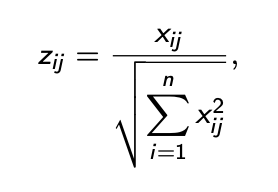

---



In [22]:
z_mian  =np.sqrt((dane_porzadkowanie.loc[:,"price":"flat_balcony"]**2).sum(axis=0))
z_mian

price                4781.573451
flat_area             135.134305
flat_rooms              5.831213
individual              0.959253
flat_furnished          1.641526
flat_deposit         3719.516216
flat_for_students       1.014905
flat_balcony            1.777388
dtype: float64

In [ ]:
dane_porzadkowanie